In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
path='C:\individual_stocks_5yr'

In [21]:
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [22]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [23]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

In [36]:
all_data['date']=pd.to_datetime(all_data['date'])

In [37]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [31]:
tech_list = all_data['Name'].unique()

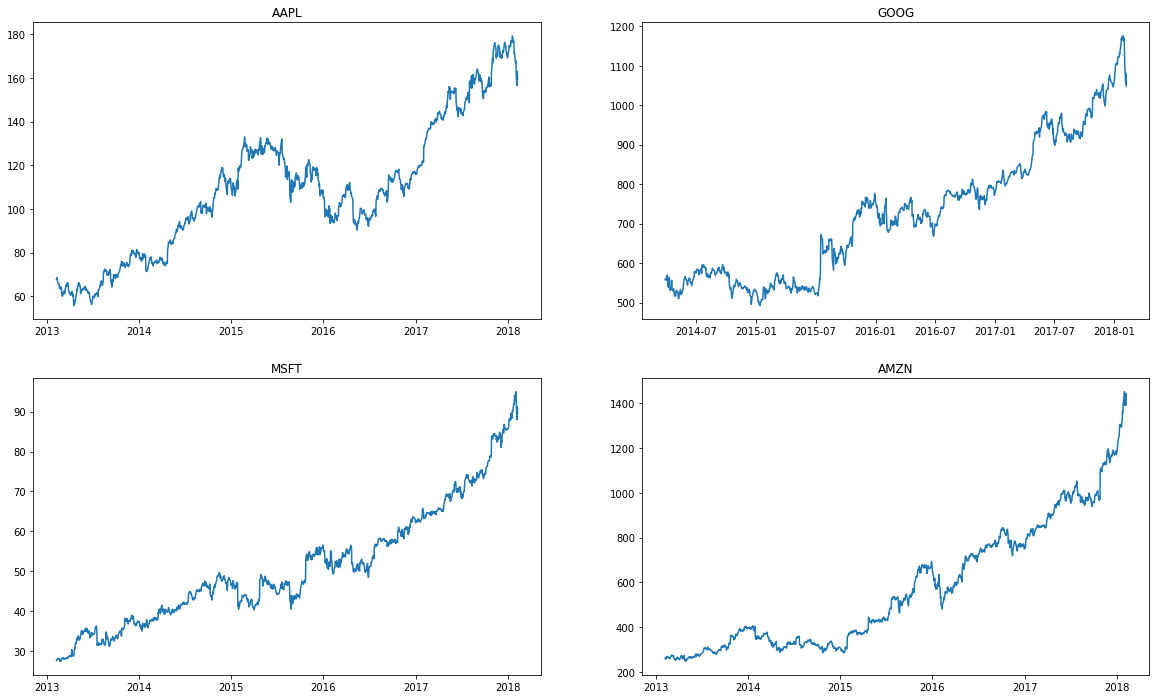

In [38]:

plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)



##### Let's analyse the total volume of stock being traded each day

In [41]:
import plotly.express as px

In [44]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

### DAILY PRICE CHANGE IN A STOCK

In [54]:
df=pd.read_csv('C:\individual_stocks_5yr/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


##### daily price change

In [55]:
df['Daily_Price_change']=df['close']-df['open']

In [51]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.7142,158168416,AAPL,0.0
1,2013-02-11,68.0714,69.2771,67.6071,68.0714,129029425,AAPL,0.0
2,2013-02-12,68.5014,68.9114,66.8205,68.5014,151829363,AAPL,0.0
3,2013-02-13,66.7442,67.6628,66.1742,66.7442,118721995,AAPL,0.0
4,2013-02-14,66.3599,67.3771,66.2885,66.3599,88809154,AAPL,0.0


## DAILY % CHANGE

##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company multiply by 100.
"""

In [57]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100

df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'Daily_Price_change', '1day % return'],
      dtype='object')

In [58]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


### To fetch the lowest and highest day, and month of return

In [62]:
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

### Monthly Mean of Close Feature

In [63]:
df2=df.copy()

In [64]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_change    float64
1day % return         float64
dtype: object

In [65]:
##converting the dates
df2['date']=pd.to_datetime(df2['date'])

In [66]:
df2.set_index('date',inplace=True)

In [67]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [68]:
## To select data within date range
df2['2013-02-08':'2013-02-20']

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,-1.888431
2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,-0.241353
2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-1.2628,-1.969389


### Monthly Mean for CLOSED Window

In [69]:
df2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

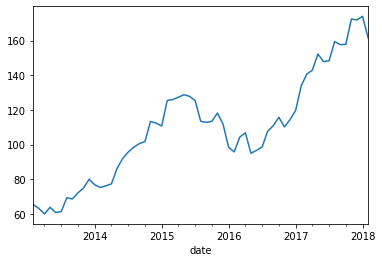

In [70]:
##PLOT THE GRAPH for the month
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

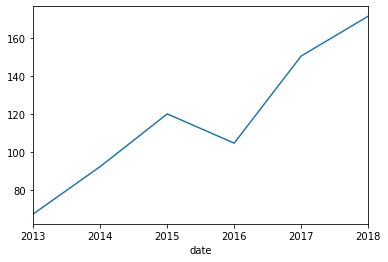

In [71]:
### CLOSE WINDOW PLOT  GRAPH FOR THE YEAR
df2['close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='date'>

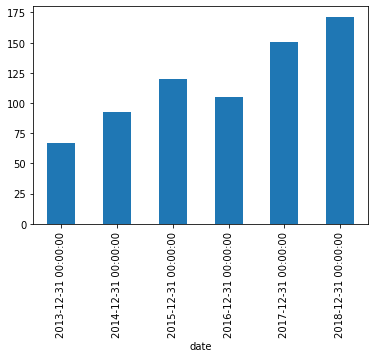

In [73]:
## BAR CHART FOR 
df2['close'].resample('Y').mean().plot(kind='bar')

##### ANALYSING WHETHER STOCK PRICES OF THESE TECH COMPANIES AMAZON, APPLE, GOOGLE, MICROSOFT ARE CORRELATED OR NOT!

In [75]:
##we extract and save the variable apple
apple=pd.read_csv('C:\individual_stocks_5yr/AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [77]:
##we extract and save the variable amazon
amazon=pd.read_csv('C:\individual_stocks_5yr/AMZN_data.csv')
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [78]:
##we extract and save the variable amazon
microsoft=pd.read_csv('C:\individual_stocks_5yr/MSFT_data.csv')
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [79]:
##we extract and save the variable google
google=pd.read_csv('C:\individual_stocks_5yr/GOOG_data.csv')
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [80]:
close=pd.DataFrame()

In [81]:
close['apple']=apple['close']
close['google']=google['close']
close['microsoft']=microsoft['close']
close['amazon']=amazon['close']

In [82]:
### Extracting close price for each company.
close.head()

,apple,google,microsoft,amazon
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


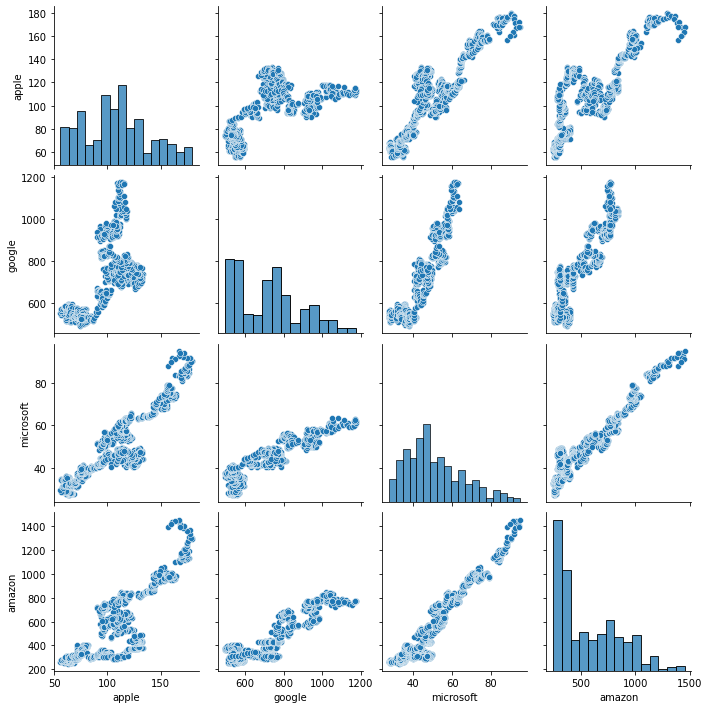

In [83]:
# Checking closing price of each tech company with SEABORN LIBRARY
# 4 columns 4 matrix because we have 4 column
sns.pairplot(data=close)

<AxesSubplot:>

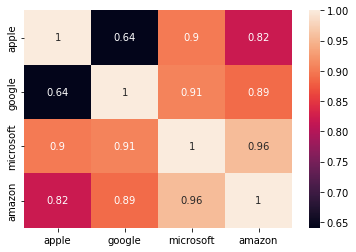

In [84]:
## HEATMAP to check co-rElatED with corr function
sns.heatmap(close.corr(),annot=True)

In [ ]:
## ANALYSES IF MICROSOFT CLOSING PRICE INCREASES THERE IS A 95% CHANCE THAT APPLE WILL INCREASE
#APPLE AND GOOGLE AREN'T CO-RELATED

In [85]:
 apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [86]:
# BLANK DATA FRAME CALLED DATA
data=pd.DataFrame()

In [ ]:
data['apple_change']=((apple['close']-apple['open'])/apple['close'])*100